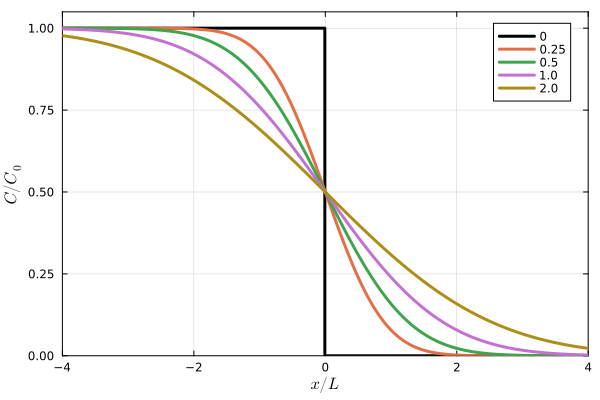

In [2]:
###############################################################################
#  Fig 2.3  –  Semi‑infinite step: C(x,t) = ½ C₀ erfc(x / 2√(Dt))
###############################################################################
using Plots              # GR backend
using SpecialFunctions   # erfc()
using LaTeXStrings

# -------------------- dimensionless grid --------------------------------------
ξ = range(-4.0, 4.0; length = 600)      # −4 ≤ x/L ≤ 4   (L chosen = 1)

# -------------------- dimensionless solution ----------------------------------
"""
    C_over_C0(ξ, dt)

Dimensionless concentration C/C₀ for the semi‑infinite step, with
     ξ = x/L   and   dt = D t / L².
"""
function C_over_C0(ξ, dt)
    if iszero(dt)                              # t = 0  → Heaviside step
        return Float64.(ξ .< 0)                # 1 for ξ<0, 0 elsewhere
    else
        α = sqrt(dt)                           # α = √(Dt)/L
        return 0.5 .* erfc.( ξ ./ (2α) )
    end
end

# -------------------- curves to plot ------------------------------------------
dt_vals = [0.0, 0.25, 0.5, 1.0, 2.0]           # required values
curves   = [C_over_C0(ξ, dt) for dt in dt_vals]

# -------------------- build the figure ----------------------------------------
plt = plot(
    xlabel = L"x/L",
    ylabel = L"C/C_0",
    xlim = (-4, 4),
    ylim = (0, 1.05),
    framestyle = :box,
    legend = :topright,
    linewidth = 3,
)

#  t = 0 rectangular profile  (no diagonal)
plot!(plt, ξ, curves[1];
      seriestype = :steppre,     # step‑wise, no closing segment
      label      = "0",
      linecolor  = :black,
      linewidth  = 3)

#  later times
for (idx, dt) in enumerate(dt_vals[2:end])
    plot!(plt, ξ, curves[idx + 1];
          label = string(dt),
          linewidth = 3)
end

# -------------------- output ---------------------------------------------------
savefig(plt, "Crank_Fig2_14.pdf")       # remove if you don’t need the file
display(plt)